In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la

In [5]:
# --- import eigenvalues and eigenvectors calculated previously --- #

eigenvalues = np.loadtxt('/Users/pedrobraga/Documents/Cambridge/wa_two/repo_wa_two/excitonic_states/Eigenvalues5.txt')
eigenvectors = np.loadtxt('/Users/pedrobraga/Documents/Cambridge/wa_two/repo_wa_two/excitonic_states/Eigenvectors5.txt')

In [55]:
# --- global variables --- #

hbar = 0.658 # eV fs
m0 = 5.6856800 # fs2 eV/nm2
mu = 0.108 * m0 # fs2 eV/nm2
kb = 8.681e-5 # ev K {-1}

veps0 = 5.52638e-2 # c{2} eV{-1} mum{-1}
vepsS = 3.32 # dimless
vepsW = 6.10 # dimless

Lwell = 0.636 # nm
A = Lwell**2 # nm{2}
r0 = Lwell * vepsW/(2*vepsS) # nm

EgZero = 2.565 # ev - zero temperature bandgap energy
n = 1.82 # dimless - refractive index of the medium 
M = 0.44 * m0 # fs2 eV/nm2 - total exciton mass
Msigma = 8 # fs ev nm{-1} - optical matrix element for interband transition
GammaZero = 0.0067 # eV - defect-induced line widgth at T = 0K

DAC = 1.9 # eV - deformation potential for acoustic phonons
DOP = 158 # eV/nm - deformation potential for optical phonons

cAC = 2100 # m/s - acoustic phonon charactetistic velocity
c0 = 299.792 # nm/fs - speed of light in vacuum
hwOP = 35 # meV - optical phonon scattering

alphaOne = 1e-4 # material specific constant for Varshni shift
alphaTwo = 340 # material specific constant for Varshni shift

# --- simulation variables --- #

k_max = .75
N = 500
dk = k_max/N

k_vals = np.linspace(dk, k_max, N)
energies = np.linspace(1, 5, 1000)

In [72]:
def BandGapEnergy(mu):
    return EgZero + eigenvalues[mu]

def RadiativeRecom(mu, eigenvalues, eigenvectors): # Temperature independent radiactive recombination of eletrons

    wavefunction = FFT(mu, eigenvectors)
    C = (hbar**2 * Msigma**2) / (2 * m0**2 * veps0 * A * n * c0)

    return C * wavefunction / eigenvalues[mu]

def FFT(mu, eigenvectors): # inverse fourier transform of the amplitude of the wavefunctions

    C = A * dk / (2*np.pi)
    integral = np.sum(eigenvectors[mu][-500:] * k_vals)

    return (C * integral)**2

def Boltzmann(T, mu, eigenvalues):
    Z = np.sum(np.exp(-eigenvalues/(kb*T)))
    return np.exp(-eigenvalues[mu]/(kb*T))/Z

In [39]:
def Photoluminescence(energy_range, T, eigenvalues, eigenvectors):

    PL = []
    C = 2 * Msigma**2 / hbar

    for E in energy_range:
        I = 0

        for mu in range(len(eigenvalues)):

            B = RadiativeRecom(mu, eigenvalues, eigenvectors) * Boltzmann(T, mu, eigenvalues)
            numerator = FFT(mu, eigenvectors)
            denominator = (BandGapEnergy(mu) - E)**2 + (RadiativeRecom(mu, eigenvalues, eigenvectors) + GammaZero)**2

            I += B * numerator/denominator

        PL.append(C*I)

    return PL

In [84]:
PL = Photoluminescence(energies, 1000, eigenvalues, eigenvectors)

(0.0, 0.5)

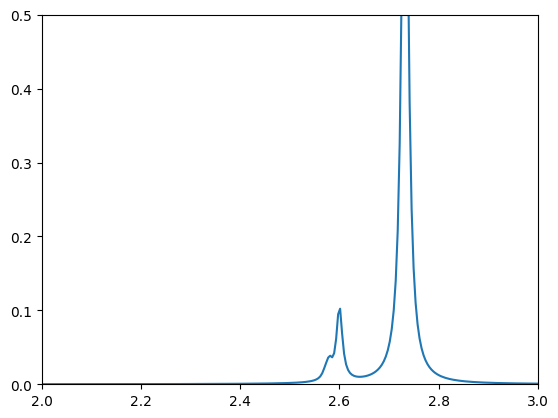

In [85]:
plt.plot(energies, PL)
plt.xlim(2, 3)
plt.ylim(0, 0.5)